In [54]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from prophet import Prophet


### TASK : Demand Forecasting
Prepare Time Series Data:
Ensure the data is in a time series format, with appropriate date indexing.


Select and Train Forecasting Model:
Choose a time series forecasting model (e.g., ARIMA, Prophet) and train it on historical data.


Validate Forecasts:
Evaluate the model’s accuracy using metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE).
Generate and plot forecasts.


In [26]:
data = pd.read_csv('final_df.csv', index_col='Unnamed: 0')

In [27]:
data.head()

,ActivitySiteID,BookingEndDateTime,Number Booked,Price (INR)
0,1,2018-04-08,-0.593867,-1.692847
1,1,2018-04-15,-0.282487,-1.692847
2,1,2018-04-22,-0.386280,-1.692847
3,1,2018-04-29,-0.905246,-1.692847
4,1,2018-05-06,-1.112833,-1.692847


In [28]:
data['BookingEndDateTime'] = pd.to_datetime(data['BookingEndDateTime'])

In [49]:
data.tail()

,ActivitySiteID,BookingEndDateTime,Number Booked,Price (INR)
3266,4,2018-06-18,-0.760415,-0.707565
3267,4,2018-06-25,-0.760415,-0.707565
3268,4,2018-06-07,0.003336,-0.707565
3269,4,2018-06-14,-0.323986,-0.707565
3270,4,2018-06-21,-0.433093,-0.707565


In [37]:
# Prepare the data for Prophet
prophet_data = data[['BookingEndDateTime', 'Number Booked']].reset_index()

In [41]:
prophet_data.drop(['index'], axis=1, inplace=True)

In [44]:
prophet_data.columns = ['ds', 'y']

In [45]:
prophet_data.head()

,ds,y
0,2018-04-08,-0.593867
1,2018-04-15,-0.282487
2,2018-04-22,-0.386280
3,2018-04-29,-0.905246
4,2018-05-06,-1.112833


In [46]:
# Initialize and train the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

20:12:38 - cmdstanpy - INFO - Chain [1] start processing
20:12:39 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
# Forecast for the next 30 periods
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)


c:\Users\SUNIL\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\SUNIL\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


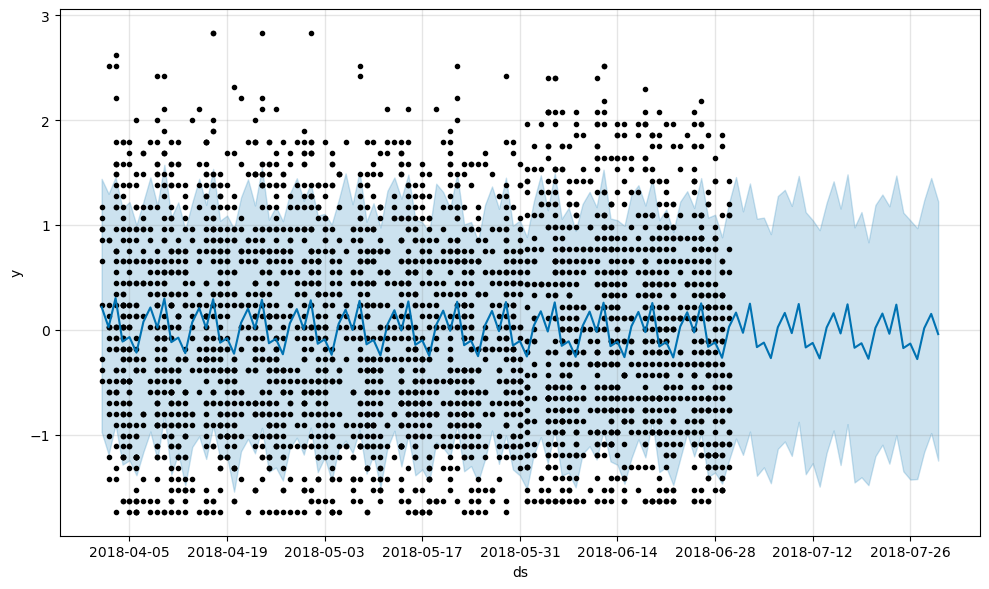

In [48]:
# Plot the forecast
fig = prophet_model.plot(forecast)
plt.show()


In [50]:
# Calculate MAE and MSE for validation
train_size = int(len(prophet_data) * 0.8)
train, test = prophet_data[:train_size], prophet_data[train_size:]

In [51]:
# Fit the model on the training data
prophet_model = Prophet()
prophet_model.fit(train)


20:14:09 - cmdstanpy - INFO - Chain [1] start processing
20:14:09 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
# Predict on the test data
test_forecast = prophet_model.predict(test[['ds']])
mae = mean_absolute_error(test['y'], test_forecast['yhat'])
mse = mean_squared_error(test['y'], test_forecast['yhat'])

print("Prophet MAE:", mae)
print("Prophet MSE:", mse)
print("Prophet RMSE:", np.sqrt(mse))


Prophet MAE: 0.8288718505322125
Prophet MSE: 0.9895046709315646
Prophet RMSE: 0.9947384937417294
